Import

In [3]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split    

In [2]:
# Set up paths to the dataset
data_dir = "./dataset-ml"  # Replace with your dataset directory

# Specify the 5 folders (classes) you want to include
selected_classes = ["anting-kayu-bali", "udeng", "keben-bali", "baju-i-love-bali", "gantungan-kunci", "dream-catcher"]  # Replace with actual folder names

# Check if the folders exist in the dataset directory
available_classes = [folder for folder in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, folder))]
print("Available classes:", available_classes)

# Ensure the selected classes exist in the dataset directory
selected_classes = [cls for cls in selected_classes if cls in available_classes]
print("Selected classes:", selected_classes)

# Load dataset and preprocess (e.g., resize and normalize images)
img_height, img_width = 150, 150  # Set image dimensions
batch_size = 32
seed_value = 42

# datagen = ImageDataGenerator(
    # rescale=1.0 / 255,  # Normalize pixel values
    # validation_split=0.2  # Split data into training and validation sets
# )

train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    validation_split=0.2,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    shear_range=0.3,
    fill_mode="nearest"
)

# train_datagen = ImageDataGenerator(
                    # rescale=1./255,
                    # validation_split=0.2,
                    # rotation_range=20,
                    # horizontal_flip=True,
                    # shear_range = 0.2,
                    # fill_mode = 'nearest')
# 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    validation_split=0.2)

train_data = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical",
    subset="training",
    classes=selected_classes,
    seed=seed_value
)

val_data = test_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation",
    classes=selected_classes,
    seed=seed_value
)

FileNotFoundError: [WinError 3] The system cannot find the path specified: './dataset-ml'

Coding the CNN

In [33]:
# Define a Convolutional Neural Network (CNN)
model = Sequential([
    Conv2D(56, (3, 3), activation="relu", input_shape=(img_height, img_width, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(train_data.num_classes, activation="softmax")  # Output layer
])

model.summary()


c:\Users\n8n0c\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 148, 148, 56)   │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 56)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 72, 72, 64)     │        32,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 34, 34, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 15, 15, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       802,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 948,390 (3.62 MB)

 Trainable params: 948,390 (3.62 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
class EarlyStoppingCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs['accuracy'] >= 0.90:
            self.model.stop_training = True
            print("\nReached 90% accuracy so cancelling training!")

In [35]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


In [36]:
epochs = 5  # Adjust based on your needs

history = model.fit(
    train_data,
    # callbacks=[EarlyStoppingCallback()],
    validation_data=val_data,
    epochs=epochs,
    verbose=1
)


Epoch 1/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 16s 430ms/step - accuracy: 0.5457 - loss: 1.3898 - val_accuracy: 0.6221 - val_loss: 1.0715
Epoch 2/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 14s 393ms/step - accuracy: 0.6294 - loss: 1.0131 - val_accuracy: 0.5802 - val_loss: 0.9977
Epoch 3/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 14s 391ms/step - accuracy: 0.6826 - loss: 0.8120 - val_accuracy: 0.5458 - val_loss: 1.0689
Epoch 4/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 14s 388ms/step - accuracy: 0.7093 - loss: 0.7951 - val_accuracy: 0.6527 - val_loss: 0.8935
Epoch 5/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 14s 391ms/step - accuracy: 0.7393 - loss: 0.7220 - val_accuracy: 0.6565 - val_loss: 0.8940


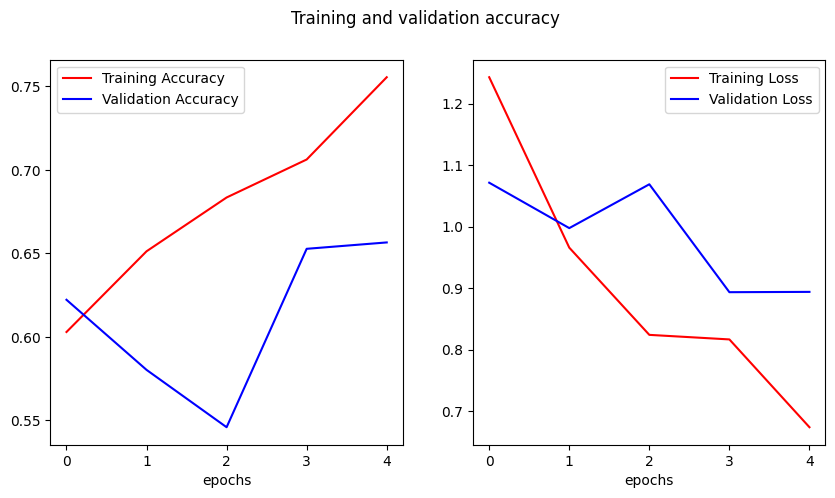

In [37]:
# Get training and validation accuracies
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Training and validation accuracy')

for i, (data, label) in enumerate(zip([(acc, val_acc), (loss, val_loss)], ["Accuracy", "Loss"])):
    ax[i].plot(epochs, data[0], 'r', label="Training " + label)
    ax[i].plot(epochs, data[1], 'b', label="Validation " + label)
    ax[i].legend()
    ax[i].set_xlabel('epochs')

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


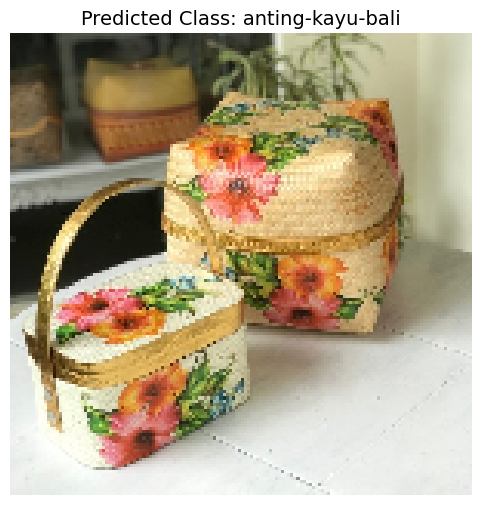

In [41]:
from tensorflow.keras.preprocessing import image

# Load and preprocess a single image
img_path = "./dataset-ml/kebenic.jpeg"  # Replace with your image path
img = image.load_img(img_path, target_size=(img_height, img_width))
img_array = image.img_to_array(img) / 255.0  # Normalize
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Predict
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)
class_labels = list(train_data.class_indices.keys())

# Display the image and the predicted class
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.axis('off')  # Turn off axis
plt.title(f"Predicted Class: {class_labels[predicted_class[0]]}", fontsize=14)
plt.show()


hikkss koo antingg kaayuu bzier

Transfer Learning Xception

In [1]:
!pip install tensorflow==2.15.* # fix bug summary in model sequential if you are using this version, please import again after restart session

ERROR: Invalid requirement: '#'

[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from keras.applications import Xception
import tensorflow as tf
from tensorflow.keras import  optimizers


In [20]:
base_model = Xception(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

In [21]:
for layer in base_model.layers:
    layer.trainable = False

In [22]:
model = tf.keras.models.Sequential([
    base_model,

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(6,activation='softmax'),
])

In [23]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ xception (Functional)           │ (None, 5, 5, 2048)     │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │    13,107,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 6)              │         1,542 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,970,478 (129.59 MB)

 Trainable params: 13,108,998 (50.01 MB)

 Non-trainable params: 20,861,480 (79.58 MB)

In [24]:
optimizer = optimizers.Adam()

In [25]:
model.compile(optimizer=optimizer,
             loss="categorical_crossentropy",
              metrics=['accuracy']
             )

In [26]:
history = model.fit(
    train_data,
    epochs=5,
    validation_data=val_data
)

Epoch 1/5


c:\Users\n8n0c\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


11/11 ━━━━━━━━━━━━━━━━━━━━ 54s 4s/step - accuracy: 0.5992 - loss: 5.5048 - val_accuracy: 0.9046 - val_loss: 0.8671
Epoch 2/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 40s 3s/step - accuracy: 0.9331 - loss: 0.6188 - val_accuracy: 0.9389 - val_loss: 0.4644
Epoch 3/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 40s 3s/step - accuracy: 0.9537 - loss: 0.3038 - val_accuracy: 0.9237 - val_loss: 0.2666
Epoch 4/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 40s 3s/step - accuracy: 0.9649 - loss: 0.1663 - val_accuracy: 0.9198 - val_loss: 0.3387
Epoch 5/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 40s 3s/step - accuracy: 0.9754 - loss: 0.0953 - val_accuracy: 0.9542 - val_loss: 0.1947


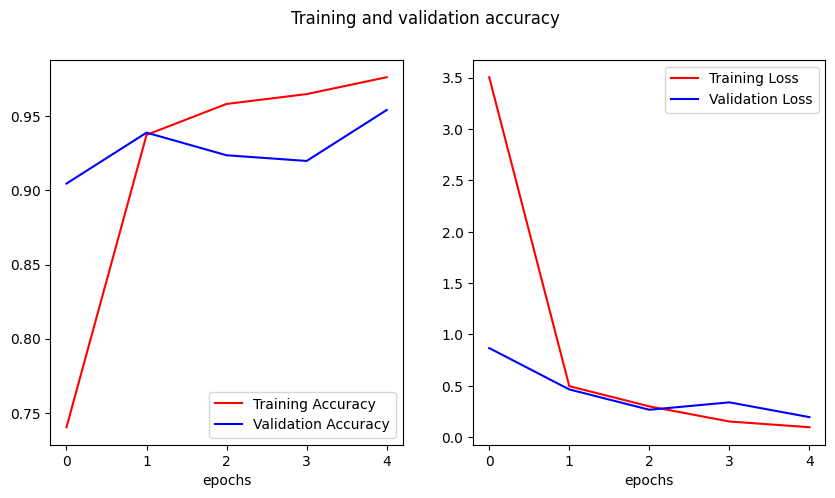

In [27]:
# Get training and validation accuracies
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Training and validation accuracy')

for i, (data, label) in enumerate(zip([(acc, val_acc), (loss, val_loss)], ["Accuracy", "Loss"])):
    ax[i].plot(epochs, data[0], 'r', label="Training " + label)
    ax[i].plot(epochs, data[1], 'b', label="Validation " + label)
    ax[i].legend()
    ax[i].set_xlabel('epochs')

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


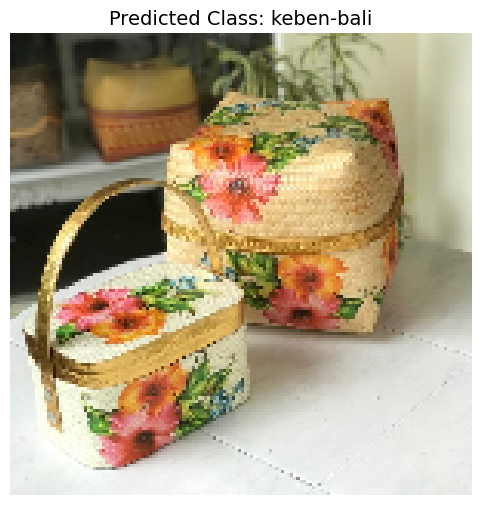

In [ ]:
from tensorflow.keras.preprocessing import image

# Load and preprocess a single image
img_path = "./dataset-ml/kebenic.jpeg"  # Buat cek aja, gambar bisa diganti
img = image.load_img(img_path, target_size=(img_height, img_width))
img_array = image.img_to_array(img) / 255.0  # Normalize
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Predict
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)
class_labels = list(train_data.class_indices.keys())

# Display the image and the predicted class
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.axis('off')  # Turn off axis
plt.title(f"Predicted Class: {class_labels[predicted_class[0]]}", fontsize=14)
plt.show()


Transfer Learning on 15 Class using Xception

In [21]:
# Set up paths to the dataset
data_dir = "D:\DBangkitEssentials\dataset-ml"  # Replace with your dataset directory

# Specify the 5 folders (classes) you want to include
selected_classes = ["anting-kayu-bali", "anting-silver", "baju-barong", "baju-bintang", "cincin-silver", "kain-pantai-bali", "gelang-manik-bali", "gelang-tridatu", "jepit-rambut", "tas-anyaman", "tempat-lilin", "lilin-aromaterapi", "udeng", "keben-bali", "baju-i-love-bali", "gantungan-kunci", "dream-catcher"]  # Replace with actual folder names

# Check if the folders exist in the dataset directory
available_classes = [folder for folder in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, folder))]
print("Available classes:", available_classes)

# Ensure the selected classes exist in the dataset directory
selected_classes = [cls for cls in selected_classes if cls in available_classes]
print("Selected classes:", selected_classes)

# Load dataset and preprocess (e.g., resize and normalize images)
img_height, img_width = 299, 299  # Set image dimensions
batch_size = 32
seed_value = 42

# datagen = ImageDataGenerator(
    # rescale=1.0 / 255,  # Normalize pixel values
    # validation_split=0.2  # Split data into training and validation sets
# )

train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    validation_split=0.2,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    shear_range=0.3,
    fill_mode="nearest"
)

# train_datagen = ImageDataGenerator(
                    # rescale=1./255,
                    # validation_split=0.2,
                    # rotation_range=20,
                    # horizontal_flip=True,
                    # shear_range = 0.2,
                    # fill_mode = 'nearest')
# 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    validation_split=0.2)

train_data = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical",
    subset="training",
    classes=selected_classes,
    seed=seed_value
)

val_data = test_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation",
    classes=selected_classes,
    seed=seed_value
)

Available classes: ['.git', 'anting-kayu-bali', 'anting-silver', 'baju-barong', 'baju-bintang', 'baju-i-love-bali', 'cincin-silver', 'coaster', 'dream-catcher', 'gantungan-kunci', 'gelang-manik-bali', 'gelang-tridatu', 'hiasan-dinding', 'jepit-rambut', 'kain-pantai-bali', 'kalung-silver', 'keben-bali', 'kipas-kayu-bali', 'kotak-tisu', 'lilin-aromaterapi', 'pie-susu', 'tas-anyaman', 'tas-rajut', 'tas-rotan', 'tempat-lilin', 'topeng-bujuh', 'topeng-dalem', 'topeng-keras', 'topeng-penasar', 'topeng-sidakarya', 'topeng-tua', 'topeng-wijil', 'udeng', '_image_url', '_utilities']
Selected classes: ['anting-kayu-bali', 'anting-silver', 'baju-barong', 'baju-bintang', 'cincin-silver', 'kain-pantai-bali', 'gelang-manik-bali', 'gelang-tridatu', 'jepit-rambut', 'tas-anyaman', 'tempat-lilin', 'lilin-aromaterapi', 'udeng', 'keben-bali', 'baju-i-love-bali', 'gantungan-kunci', 'dream-catcher']
Found 2540 images belonging to 17 classes.
Found 630 images belonging to 17 classes.


In [22]:
from keras.applications import Xception
import tensorflow as tf
from tensorflow.keras import  optimizers


In [30]:
base_model = Xception(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

In [31]:
for layer in base_model.layers:
    layer.trainable = False

In [55]:
model = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(17,activation='softmax'),
])

In [56]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ xception (Functional)           │ (None, 10, 10, 2048)   │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 204800)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 256)            │    52,429,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 17)             │         4,369 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 73,294,905 (279.60 MB)

 Trainable params: 52,433,425 (200.02 MB)

 Non-trainable params: 20,861,480 (79.58 MB)

In [57]:
optimizer = optimizers.Adam()

In [58]:
model.compile(optimizer=optimizer,
             loss="categorical_crossentropy",
              metrics=['accuracy']
             )

In [61]:
history = model.fit(
    train_data,
    epochs=20,
    validation_data=val_data
)

Epoch 1/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 359s 4s/step - accuracy: 0.8716 - loss: 0.5005 - val_accuracy: 0.7635 - val_loss: 1.5513
Epoch 2/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 360s 4s/step - accuracy: 0.8871 - loss: 0.5080 - val_accuracy: 0.7667 - val_loss: 1.8790
Epoch 3/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 358s 4s/step - accuracy: 0.8888 - loss: 0.4394 - val_accuracy: 0.7905 - val_loss: 1.0507
Epoch 4/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 343s 4s/step - accuracy: 0.9143 - loss: 0.2512 - val_accuracy: 0.7873 - val_loss: 2.0007
Epoch 5/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 307s 4s/step - accuracy: 0.9121 - loss: 0.3130 - val_accuracy: 0.7762 - val_loss: 2.1316
Epoch 6/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 304s 4s/step - accuracy: 0.8990 - loss: 0.3864 - val_accuracy: 0.7905 - val_loss: 1.4489
Epoch 7/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 303s 4s/step - accuracy: 0.9106 - loss: 0.4161 - val_accuracy: 0.7952 - val_loss: 1.2042
Epoch 8/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 296s 4s/step - accuracy: 0.8954 - loss: 0.3718 - val_accuracy: 0.8111 - v

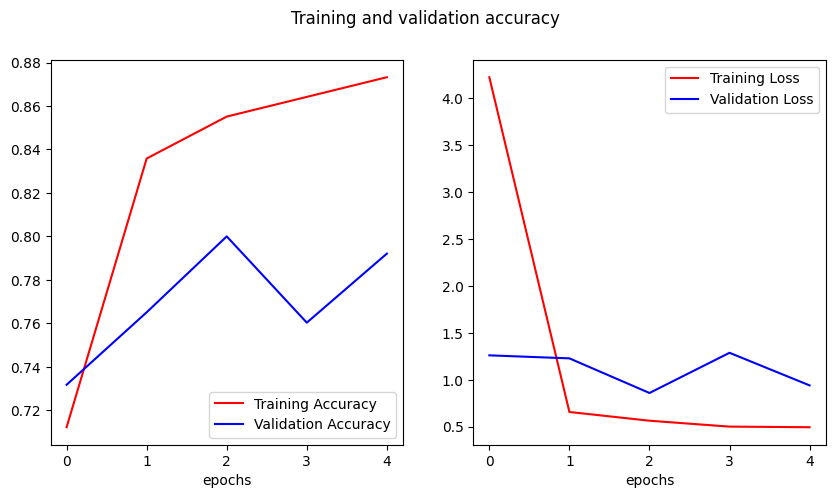

In [60]:
# Get training and validation accuracies
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Training and validation accuracy')

for i, (data, label) in enumerate(zip([(acc, val_acc), (loss, val_loss)], ["Accuracy", "Loss"])):
    ax[i].plot(epochs, data[0], 'r', label="Training " + label)
    ax[i].plot(epochs, data[1], 'b', label="Validation " + label)
    ax[i].legend()
    ax[i].set_xlabel('epochs')

plt.show()